# Project 1: SAT & ACT Analysis

## Problem Statement

A new format for the SAT exam has been released in March 2016. This project aims to make recommendations to the College Board on where money could be best spent as well as strategies to improve SAT participation rates.

## Executive Summary

The project will track statewide participation rates across SAT and ACT exams in years 2017 and 2018. It will explore the reasons for any signficant changes and recommend a state of choice to improve its participation rate in the SAT assessment.

### Contents:
- [Libraries](#Libraries)
- [2017 Data Import and Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Visualising The Data](#Visualising-The-Data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

## Libraries

In [10]:
# Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT 2017 Data


In [11]:
# Reading in SAT & ACT 2017 Data:

df_sat1 = pd.read_csv('../data/sat_2017.csv')
df_act1 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data


In [12]:
# Code for SAT 10Data

df_sat1.head(n=10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [13]:
# Code for ACT Data

df_act1.head(n=10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Both the SAT and ACT datasets provide information on participation rates as well as scores for different subjects in various states in the US. While SAT students were only graded for evidence-based reading and writing and math, ACT students have been graded for English, Math, Reading and Science. It should also be noted that the data for ACT contains a national average which the data for SAT does not.

#### 4a. Does the data look complete? 

Answer: The data does look complete for now as there are no missing or null values being detected. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

In [14]:
# Summary Stats for SAT 2017

df_sat1.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [15]:
# Summary Stats for ACT 2017

df_act1.describe()                            

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Answer: 

For SAT, the minimum and maximum values recorded are as follows for Evidence-Based Reading & Writing (482.0/644.0) and Math (52.0/651.0). The minimum value recorded for Math (52.0) is below the possible minimum SAT score (200).

For ACT, the minimum and maximum values recorded are as follows for English (16.3/25.5), Math (18.0/25.3), Reading (18.1/26.0) and Science (2.3/24.9). The minimum value recorded for Science (2.3) is an outlier value that we need to look at. Also, the "Composite' column has been dropped from the summary and needs to be investigated.

In [16]:
# To check for errors in SAT 2017 (Math)

df_sat1[df_sat1['Math'] < 200]                         ### Good

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [17]:
# To check for errors in SAT 2017 (Science)

df_act1[df_act1['Science'] < 15]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [18]:
# To check for values in ACT 2017 (Composite)

df_act1[["Composite"]]                                  ### Try to avoid printing the dataset -- 

,Composite
0,21.0
1,19.2
2,19.8
3,19.7
4,19.4
5,22.8
6,20.8
7,25.2
8,24.1
9,24.2


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [19]:
# Fix SAT 2017 Dataset ("Math" Colummn)

df_sat1.loc[[20],["Math"]] = 524                    ## Good
df_sat1.loc[[20]]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [20]:
# Fix ACT 2017 Dataset ("Science" Column)
df_act1.loc[[21],["Science"]] = 23.2
df_act1.loc[[21]]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [21]:
# Fix ACT 2017 Dataset ("Composite" Column)

df_act1.loc[[51],["Composite"]] = 20.2
df_act1.loc[[51]]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [22]:
# Data Type for SAT 2017

df_sat1.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [23]:
# Data Type for ACT 2017

df_act1.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: In both datasets, the data in the 'participation' column should be of a 'float' type. In the ACT dataset, the data in the 'composite' column should also be of a 'float' type.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [24]:
# Function to remove percentage and convert to an appropriate numeric type

def to_create_float(entry):
    entry = entry.replace('%', '')
    return float(entry) / 100

- Fix any individual values preventing other columns from being the appropriate type.

In [25]:
# Convert "Participation" column in SAT 2017 dataset

df_sat1["Participation"] = df_sat1["Participation"].map(to_create_float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
# Convert "Participation" column in ACT 2017 dataset

df_act1["Participation"] = df_act1["Participation"].map(to_create_float)

In [27]:
# Convert "Composite" column in ACT 2017 dataset

df_act1["Composite"] = df_act1["Composite"].astype(float)

- Display the data types again to confirm they are correct.

In [28]:
# Show Data Types for SAT 2017
df_sat1.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [29]:
# Show Data Types for ACT 2017
df_act1.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [30]:
# SAT 2017 Column Names

sat_dictionary = {"State": "state", 
                  "Participation": "sat_participation_2017", 
                  "Evidence-Based Reading and Writing": "sat_evidence_based_2017",
                 "Math": "sat_math_2017",
                 "Total": "sat_total_2017"}

df_sat1 = df_sat1.rename(columns = sat_dictionary)     ### or use df_sat1.columns = ['state','sat_participation_2017',...]

# ACT 2017 Column Names

act_dictionary = {"State": "state", 
                  "Participation": "act_participation_2017", 
                  "English": "act_english_2017",
                 "Math": "act_math_2017",
                 "Reading": "act_reading_2017",
                 "Science": "act_science_2017",
                 "Composite": "act_composite_2017"}

df_act1 = df_act1.rename(columns = act_dictionary)


#### 8. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [31]:
#Remove 'National Average' row from ACT 2017 Dataset

df_act1 = df_act1.drop(df_act1.index[0])
df_act1.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 9. ACT/SAT 2017 Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT/ACT 2017|Name of State|
|sat_participation_2017|float|SAT 2017|SAT Participation Rate in 2017|
|sat_evidence_based_2017|integer|SAT 2017|Average SAT 2017 Score in English & Writing|
|sat_math_2017|integer|SAT 2017|Average SAT 2017 Score in Math|
|sat_total_2017|integer|SAT 2017|Combined Total 2017 SAT Score|
|act_participation_2017|float|ACT 2017|ACT Participation Rate in 2017|
|act_english_2017|float|ACT 2017|Average ACT 2017 Score in English
|act_math_2017|float|ACT 2017|Average ACT 2017 Score in Math
|act_reading_2017|float|ACT 2017|Average ACT 2017 Score in Reading
|act_science_2017|float|ACT 2017|Average ACT 2017 Score in Science
|act_composite_2017|float|ACT 2017|Average ACT 2017 Score

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [32]:
final_2017_df = pd.merge(df_sat1, df_act1, how = "outer", on = "state")
final_2017_df.describe().T          ### Good. Much easier to read. 

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,0.398039,0.352766,0.02,0.04,0.38,0.66,1.0
sat_evidence_based_2017,51.0,569.117647,45.666901,482.00,533.50,559.00,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.50,548.00,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.50,1107.00,1212.00,1295.0
act_participation_2017,51.0,0.652549,0.321408,0.08,0.31,0.69,1.00,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.00,20.70,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.40,20.90,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.45,21.80,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.20,19.95,21.30,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.80,19.80,21.40,23.60,25.5


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [33]:
final_2017_df.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

#### 1. Read in SAT and ACT 2018 data

In [34]:
df_sat2 = pd.read_csv('../data/sat_2018.csv')
df_act2 = pd.read_csv('../data/act_2018_updated.csv')

#### 2. Display SAT 2018 Data

In [35]:
df_sat2.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [36]:
df_sat2.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [37]:
df_sat2.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 3. Fixing SAT 2018 Data Errors

#### Data Dictionary of Errors

[Errors found after comparing Online SAT 2018 Scores & Dataset Provided](https://ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf)

|From:|State|Evidence-Based Reading and Writing|Math|Total|Participation
|---|---|---|---|---|---|
|PDF Source|Florida|522|493|1014|0.97|
|Dataset|Florida|550|549|1099|0.56
|PDF Source|Hawaii|550|549|1099|0.56
|Dataset|Hawaii|480|530|1010|0.56
|PDF Source|Indiana|546|539|1086|0.67
|Dataset|Indiana|542|532|1074|0.63
|PDF Source|South Dakota|622|618|1241|0.03
|Dataset|South Dakota|622|618|1240|0.03
|PDF Source|Utah|618|612|1230|0.04
|Dataset|Utah|480|530|1010|0.04


In [38]:
# Convert "Participation" column in SAT dataset

df_sat2["Participation"] = df_sat2["Participation"].map(to_create_float)

In [39]:
# Fix SAT 2018 (Florida)

df_sat2.loc[9,"Evidence-Based Reading and Writing"] = 522
df_sat2.loc[9,"Math"]  = 493
df_sat2.loc[9,"Total"]  = 1014
df_sat2.loc[9,"Participation"]  = 0.97
df_sat2.loc[9]                                                  ### Good Effort

State                                 Florida
Participation                            0.97
Evidence-Based Reading and Writing        522
Math                                      493
Total                                    1014
Name: 9, dtype: object

In [40]:
# Fix SAT 2018 (Hawaii)

df_sat2.loc[11,"Evidence-Based Reading and Writing"]  = 480
df_sat2.loc[11,"Math"]  = 530
df_sat2.loc[11,"Total"]  = 1010
df_sat2.loc[11,"Participation"]  = 0.56
df_sat2.loc[11]

State                                 Hawaii
Participation                           0.56
Evidence-Based Reading and Writing       480
Math                                     530
Total                                   1010
Name: 11, dtype: object

In [41]:
# Fix SAT 2018 (Indiana)

df_sat2.loc[14,"Evidence-Based Reading and Writing"]  = 546
df_sat2.loc[14,"Math"]  = 539
df_sat2.loc[14,"Total"]  = 1086
df_sat2.loc[14,"Participation"]  = 0.67
df_sat2.loc[14]

State                                 Indiana
Participation                            0.67
Evidence-Based Reading and Writing        546
Math                                      539
Total                                    1086
Name: 14, dtype: object

In [42]:
# Fix SAT 2018 (South Dakota)

df_sat2.loc[41,"Evidence-Based Reading and Writing"]  = 622
df_sat2.loc[41,"Math"]  = 618
df_sat2.loc[41,"Total"]  = 1241
df_sat2.loc[41,"Participation"]  = 0.03
df_sat2.loc[41]

State                                 South Dakota
Participation                                 0.03
Evidence-Based Reading and Writing             622
Math                                           618
Total                                         1241
Name: 41, dtype: object

In [43]:
# Fix SAT 2018 (Utah)

df_sat2.loc[44,"Evidence-Based Reading and Writing"]  = 618
df_sat2.loc[44,"Math"]  = 612
df_sat2.loc[44,"Total"]  = 1230
df_sat2.loc[44,"Participation"]  = 0.04
df_sat2.loc[44]

State                                 Utah
Participation                         0.04
Evidence-Based Reading and Writing     618
Math                                   612
Total                                 1230
Name: 44, dtype: object

#### 4. Display ACT 2018 Data

In [44]:
df_act2.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [45]:
df_act2.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [46]:
df_act2.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

#### 5. Fixing ACT 2018 Data Errors

In [47]:
# Convert "Participation" column in ACT dataset

def to_create_another_float(entry):
    return float(entry) / 100

df_act2["Percentage of Students Tested"] = df_act2["Percentage of Students Tested"].apply(to_create_another_float)


In [48]:
# SAT 2018 Column Names

sat_dictionary = {"State": "state", 
                  "Participation": "sat_participation_2018", 
                  "Evidence-Based Reading and Writing": "sat_evidence_based_2018",
                 "Math": "sat_math_2018",
                 "Total": "sat_total_2018"}

df_sat2 = df_sat2.rename(columns = sat_dictionary)

# ACT 2018 Column Names

act_dictionary = {"State": "state", 
                  "Percentage of Students Tested": "act_participation_2018", 
                  "Average English Score": "act_english_2018",
                 "Average Math Score": "act_math_2018",
                 "Average Reading Score": "act_reading_2018",
                 "Average Science Score": "act_science_2018",
                 "Average Composite Score": "act_composite_2018"}

df_act2 = df_act2.rename(columns = act_dictionary)


#### 6. ACT/SAT 2018 Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT/ACT 2018|Name of State|
|sat_participation_2018|float|SAT 2018|SAT Participation Rate in 2018|
|sat_evidence_based_2018|integer|SAT 2018|Average SAT 2018 Score in English & Writing|
|sat_math_2018|integer|SAT 2018|Average SAT 2018 Score in Math|
|sat_total_2018|integer|SAT 2018|Combined Total 2018 SAT Score|
|act_participation_2018|float|ACT 2018|ACT Participation Rate in 2018|
|act_english_2018|float|ACT 2018|Average ACT 2018 Score in English
|act_math_2018|float|ACT 2018|Average ACT 2018 Score in Math
|act_reading_2018|float|ACT 2018|Average ACT 2018 Score in Reading
|act_science_2018|float|ACT 2018|Average ACT 2018 Score in Science
|act_composite_2018|float|ACT 2018|Average ACT 2018 Score

#### 7. Combining 2017 and 2018 Data Into A Single Dataframe

In [49]:
final_2018_df = pd.merge(df_sat2, df_act2, how = "outer", on = "state") 
combined_df = pd.merge(final_2017_df, final_2018_df, how = "outer", on = "state")
combined_df.head()
combined_df.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
# Tranpose output of pandas

combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_evidence_based_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_participation_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_composite_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually Calculate Standard Deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
# Function to calculate standard deviation of a Dataframe series or column

def calc_std(col):
    std = 0 
    mean = col.mean()
    for i in range(len(col)): 
        std += (col[i] - mean) ** 2             ### Be careful since what you're calculating here isn't a standard deviation
    std = std / len(col) 
    std = std ** 0.5                            ### Try to avoid overriding variables like this
    return std

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [52]:
# Applying standard deviation function to numeric columns:

{x: calc_std(combined_df[x]) for x in combined_df.columns if combined_df[x].dtypes != object}  ### Good

{'sat_participation_2017': 0.3492907076664507,
 'sat_evidence_based_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 0.3763965409204987,
 'sat_evidence_based_2018': 46.42296724397834,
 'sat_math_2018': 48.54092555037653,
 'sat_total_2018': 94.23580001985734,
 'act_participation_2018': 0.33745194881997503,
 'act_composite_2018': 2.0855261815801147,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: My calculated standard deviations values are rather similar to both methods. This might be due to certain rounding errors in the function that was built.

In [53]:
### It's actually due to the difference in the degrees of freedom used in both methods. The numpy implementation 
### and provided formula use a ddof = 0 approach to calculating the (sample) standard deviation, whereas the 
### pandas impletmentation defaults to ddof = 1.
###
### Practically, this means the the sum of squared deviations Σ (x_i - x_bar)^2 gets divided by N in the first case, and 
### N-1 in the latter case. 
###
### Looking at the sat_participation_2017 for and pandas, we have values of 0.352766 (pandas) and 0.3492907076664507(std).
### We can obtain one from the other by multiplying by the appropriate prefactor.
###
### combined_df.shape            -> (51, 21)                   # N = 51
### 0.352766 * (50/51) ** 0.5    -> 0.3492903881457095         # remember the square root since it's an standard deviation
###
### Rounding errors from floating point calculations don't typically set in so early. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [57]:
# Sort by highest SAT 2017 Participation

sort_sat_2017_high = combined_df.sort_values("sat_participation_2017", ascending = False).head()
sort_sat_2017_high[["state","sat_participation_2017"]]

,state,sat_participation_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [58]:
# Sort by highest SAT 2018 Participation

sort_sat_2018_high = combined_df.sort_values("sat_participation_2018", ascending = False).head()
sort_sat_2018_high[["state","sat_participation_2018"]]

,state,sat_participation_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


In [67]:
# Sort by lowest SAT 2017 Participation

sort_sat_2017_low = combined_df.sort_values("sat_participation_2017", ascending = True).head()
sort_sat_2017_low[["state","sat_participation_2017"]]

,state,sat_participation_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [68]:
# Sort by lowest SAT 2018 Participation

sort_sat_2018_low = combined_df.sort_values("sat_participation_2018", ascending = True).head()
sort_sat_2018_low[["state","sat_participation_2018"]]

,state,sat_participation_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [69]:
# Sort by highest ACT 2017 Participation

sort_act_2017_high = combined_df.sort_values("act_participation_2017", ascending = False).head()
sort_act_2017_high[["state","act_participation_2017"]]

,state,act_participation_2017
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


In [70]:
# Sort by highest ACT 2018 Participation

sort_act_2018_high = combined_df.sort_values("act_participation_2018", ascending = False).head()
sort_act_2018_high[["state","act_participation_2018"]]

,state,act_participation_2018
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


In [71]:
# Sort by lowest ACT 2017 Participation

sort_act_2017_low = combined_df.sort_values("act_participation_2017", ascending = True).head()
sort_act_2017_low[["state","act_participation_2017"]]

,state,act_participation_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [72]:
# Sort by lowest ACT 2018 Participation

sort_act_2018_low = combined_df.sort_values("act_participation_2018", ascending = True).head()
sort_act_2018_low[["state","act_participation_2018"]]

,state,act_participation_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In [73]:
# Compare SAT 2017 and 2018 with 100% Participation Rate

comparison_sat = combined_df[(combined_df.sat_participation_2018 == 1.00) | (combined_df.sat_participation_2017 == 1.00)][["state","sat_participation_2017", "sat_participation_2018"]]
comparison_sat["sat_rate_change"] = comparison_sat["sat_participation_2018"] - comparison_sat["sat_participation_2017"]
comparison_sat[comparison_sat["sat_rate_change"] != 0.00]

,state,sat_participation_2017,sat_participation_2018,sat_rate_change
5,Colorado,0.11,1.00,0.89
8,District of Columbia,1.00,0.92,-0.08
12,Idaho,0.93,1.00,0.07


In [74]:
# Compare ACT 2017 and 2018 with 100% Participation Rate

comparison_act = combined_df[(combined_df.act_participation_2018 == 1.00) | (combined_df.act_participation_2017 == 1.00)][["state","act_participation_2017", "act_participation_2018"]]
comparison_act["act_rate_change"] = comparison_act["act_participation_2018"] - comparison_act["act_participation_2017"]
comparison_act[comparison_act["act_rate_change"] != 0.00]

,state,act_participation_2017,act_participation_2018,act_rate_change
5,Colorado,1.00,0.30,-0.70
23,Minnesota,1.00,0.99,-0.01
27,Nebraska,0.84,1.00,0.16
35,Ohio,0.75,1.00,0.25


In [75]:
# Compare whether SAT and ACT 2017 have more than 50% participation rate

combined_df[((combined_df.sat_participation_2017 > 0.5) & (combined_df.act_participation_2017 > 0.5))][["state","sat_participation_2017", "act_participation_2017"]]


,state,sat_participation_2017,act_participation_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [76]:
# Compare whether SAT and ACT 2018 have more than 50% participation rate

combined_df[((combined_df.sat_participation_2018 > 0.5) & (combined_df.act_participation_2018 > 0.5))][["state","sat_participation_2018", "act_participation_2018"]]


,state,sat_participation_2018,act_participation_2018
9,Florida,0.97,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


In [77]:
# Sort By Highest 2017 SAT Total Score

sort_sat_2017_total_high = combined_df.sort_values("sat_total_2017", ascending = False).head()
sort_sat_2017_total_high[["state","sat_total_2017"]]

,state,sat_total_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [78]:
# Sort By Highest 2018 SAT Total Score

sort_sat_2018_total_high = combined_df.sort_values("sat_total_2018", ascending = False).head()
sort_sat_2018_total_high[["state","sat_total_2018"]]

,state,sat_total_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [79]:
# Sort By Lowest 2017 SAT Total Score

sort_sat_2017_total_low = combined_df.sort_values("sat_total_2017", ascending = True).head()
sort_sat_2017_total_low[["state","sat_total_2017"]]

,state,sat_total_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [80]:
# Sort By Lowest 2018 SAT Total Score

sort_sat_2018_total_low = combined_df.sort_values("sat_total_2018", ascending = True).head()
sort_sat_2018_total_low[["state","sat_total_2018"]]

,state,sat_total_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
11,Hawaii,1010


In [81]:
# Sort By Highest 2017 ACT Composite Score

sort_act_2017_composite_high = combined_df.sort_values("act_composite_2017", ascending = False).head()
sort_act_2017_composite_high[["state","act_composite_2017"]]

,state,act_composite_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [82]:
# Sort By Highest 2018 ACT Composite Score

sort_act_2018_composite_high = combined_df.sort_values("act_composite_2018", ascending = False).head()
sort_act_2018_composite_high[["state","act_composite_2018"]]

,state,act_composite_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [83]:
# Sort By Lowest 2017 ACT Composite Score

sort_act_2017_composite_low = combined_df.sort_values("act_composite_2017", ascending = True).head()
sort_act_2017_composite_low[["state","act_composite_2017"]]

,state,act_composite_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [84]:
# Sort By Lowest 2018 ACT Composite Score

sort_act_2018_composite_low = combined_df.sort_values("act_composite_2018", ascending = True).head()
sort_act_2018_composite_low[["state","act_composite_2018"]]

,state,act_composite_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


## Visualising The Data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

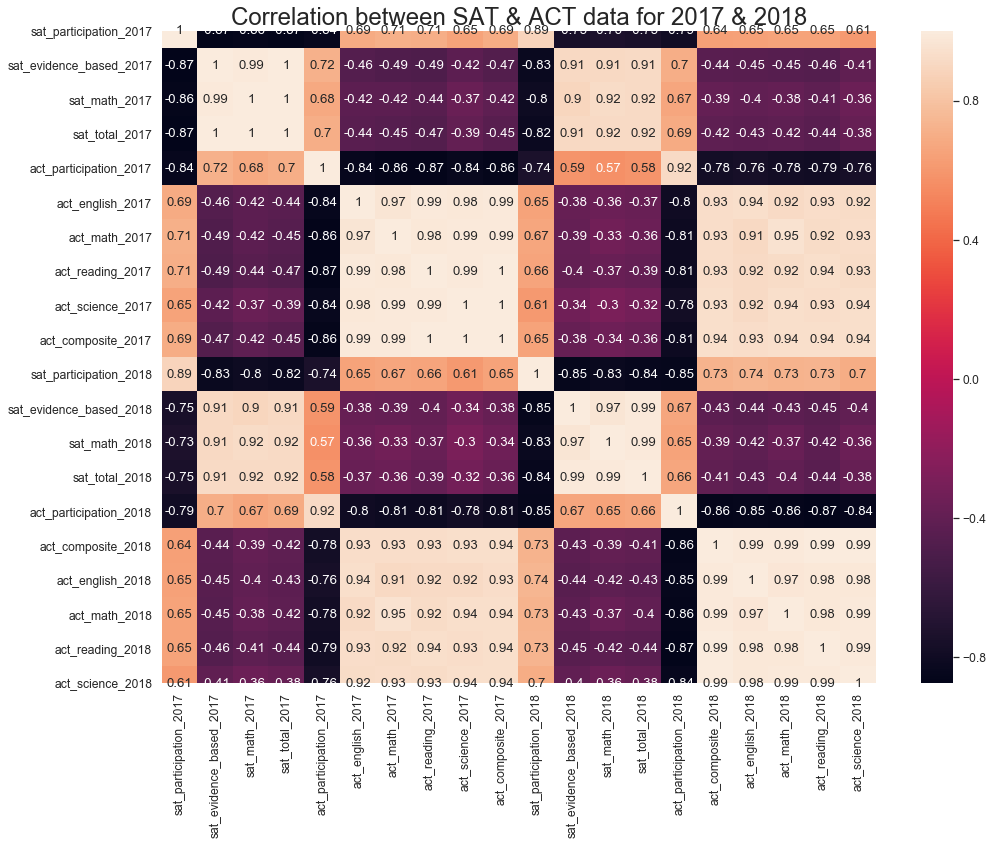

In [85]:
import seaborn as sns
sns.set(font_scale=1.1)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,12)) 
plt.title("Correlation between SAT & ACT data for 2017 & 2018", fontsize = 24)
sns.heatmap(combined_df.corr(),annot=True)                     ### Good, but might want to mask half the values next time

### Histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [86]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel("No. of States")

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

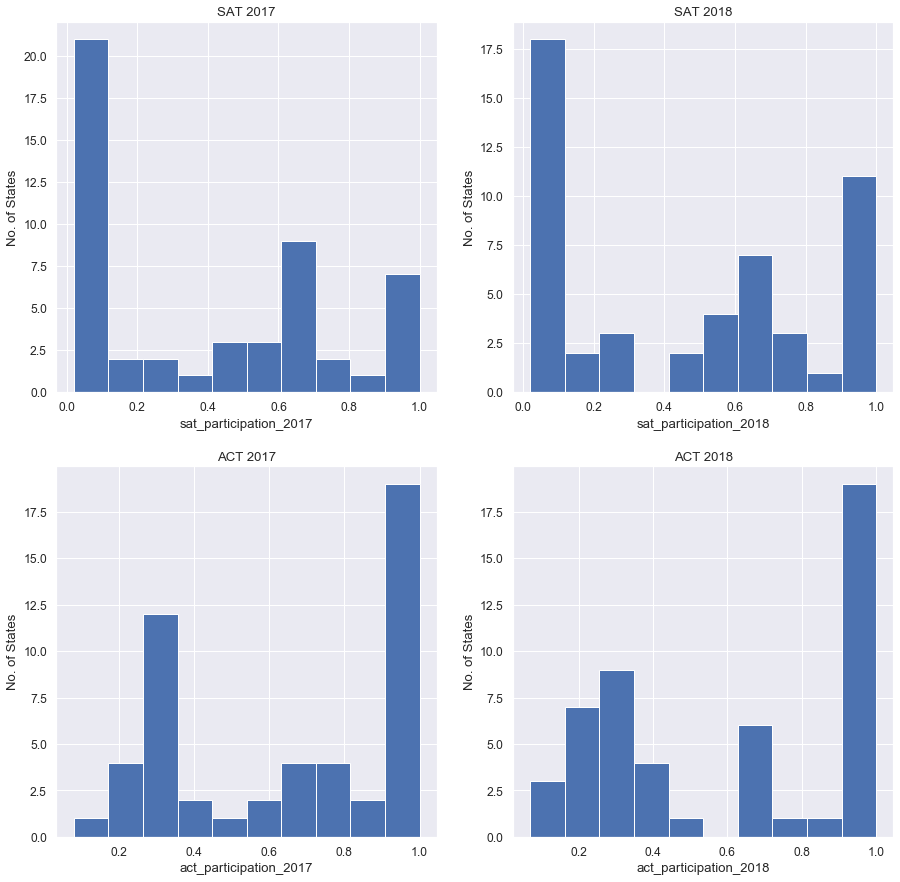

In [87]:
# Plot Histogram for SAT & ACT (Participation Rates)

list_of_columns = ['sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018']
list_of_titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
list_of_xlabels = [k for k in list_of_columns]

subplot_histograms(combined_df, list_of_columns, list_of_titles, list_of_xlabels)

In [ ]:
### It's difficult to compare across SAT scores when the two plots don't share the same y-axis scaling.
### Scaling should be consistent for comparison to be meaningful.
### The additional kwarg (keyword argument) that needs to be specified in the function
### should be plt.subplots(..., sharey='row') for it to share the y-axes across subplot rows.
### Otherwise nice plots.

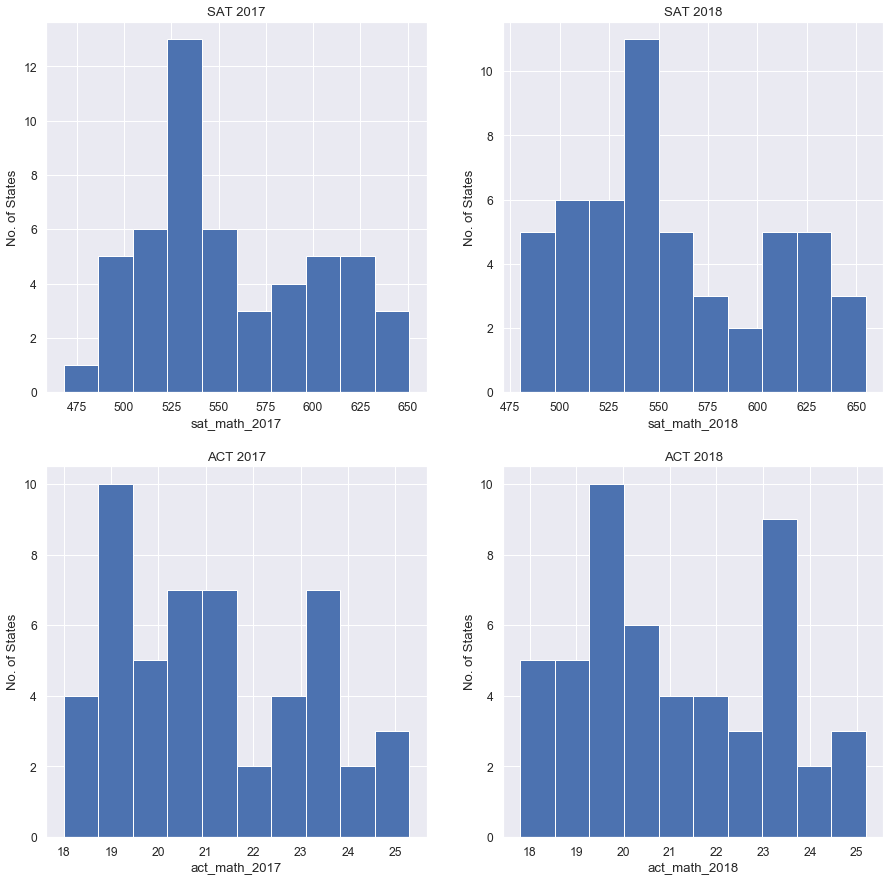

In [67]:
# Plot Histogram for SAT & ACT (Math Scores)

list_of_columns = ['sat_math_2017', 'sat_math_2018', 'act_math_2017', 'act_math_2018']
list_of_titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
list_of_xlabels = [k for k in list_of_columns]

subplot_histograms(combined_df, list_of_columns, list_of_titles, list_of_xlabels)

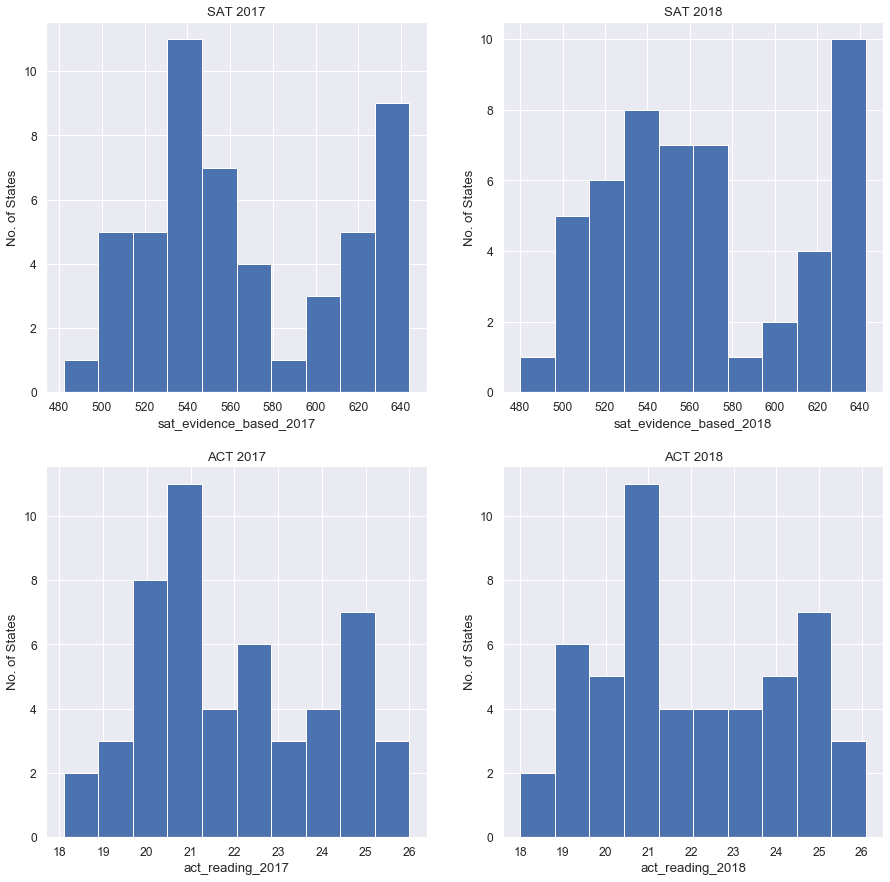

In [68]:
# Plot Histogram for SAT & ACT (Reading & Verbal Scores)

list_of_columns = ['sat_evidence_based_2017', 'sat_evidence_based_2018', 'act_reading_2017', 'act_reading_2018']
list_of_titles = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']
list_of_xlabels = [k for k in list_of_columns]

subplot_histograms(combined_df, list_of_columns, list_of_titles, list_of_xlabels)

### Scatter Plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0, 0.5, 'ACT')

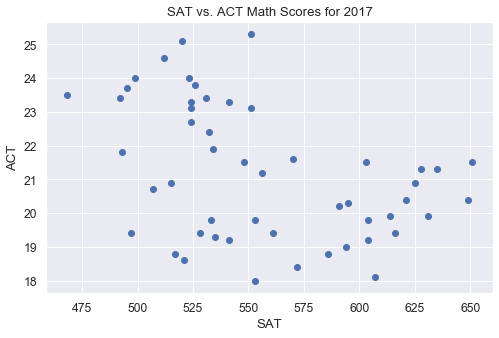

In [69]:
# Scatter Plot (SAT vs. ACT Math Scores for 2017)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(combined_df.sat_math_2017, combined_df.act_math_2017)
ax.set_title('SAT vs. ACT Math Scores for 2017')
ax.set_xlabel('SAT')
ax.set_ylabel('ACT')

In [ ]:
### Underperformers/overperformers are not immediately obvious from the plot. 
### Maybe a bar plot would be better in this case. But don't go overboard with 50+ bars.

Text(0, 0.5, 'ACT')

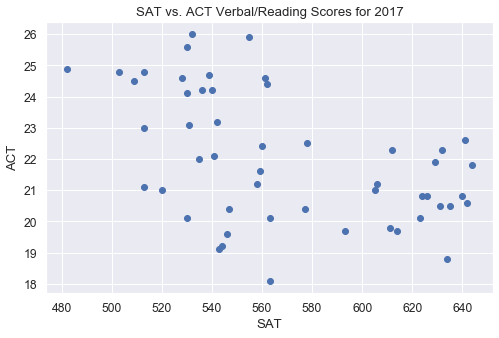

In [70]:
# Scatter Plot (SAT vs. ACT Verbal/Reading Scores for 2017)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(combined_df.sat_evidence_based_2017, combined_df.act_reading_2017)
ax.set_title('SAT vs. ACT Verbal/Reading Scores for 2017')
ax.set_xlabel('SAT')
ax.set_ylabel('ACT')

Text(0, 0.5, 'ACT')

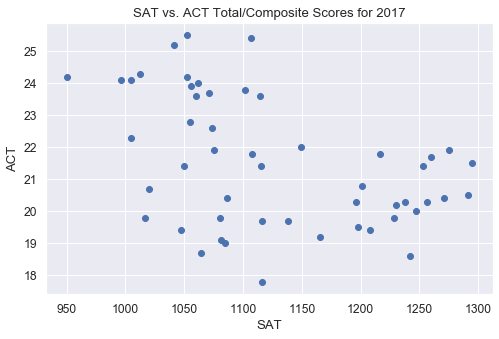

In [71]:
# Scatter Plot (SAT vs. ACT Total/Composite Scores for 2017)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(combined_df.sat_total_2017, combined_df.act_composite_2017)
ax.set_title('SAT vs. ACT Total/Composite Scores for 2017')
ax.set_xlabel('SAT')
ax.set_ylabel('ACT')

Text(0, 0.5, 'SAT Score 2018')

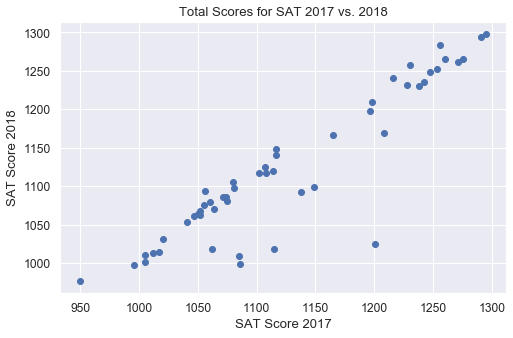

In [72]:
# Scatter Plot (Total Scores for SAT 2017 vs. 2018)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(combined_df.sat_total_2017, combined_df.sat_total_2018)
ax.set_title('Total Scores for SAT 2017 vs. 2018')
ax.set_xlabel('SAT Score 2017')
ax.set_ylabel('SAT Score 2018')

Text(0, 0.5, 'ACT Score 2018')

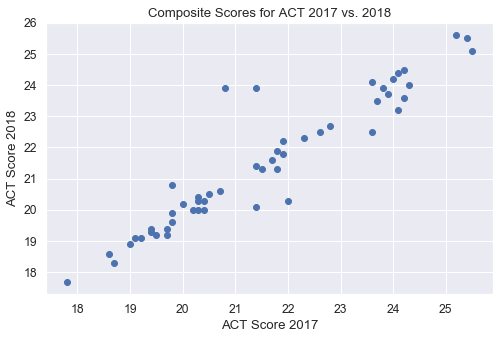

In [73]:
# Scatter Plot (Composite Scores for ACT 2017 vs. 2018)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(combined_df.act_composite_2017, combined_df.act_composite_2018)
ax.set_title('Composite Scores for ACT 2017 vs. 2018')
ax.set_xlabel('ACT Score 2017')
ax.set_ylabel('ACT Score 2018')

In [ ]:
### Generally correct, but drawing a sat_total_2018 = sat_total_2017 y=x line and annotating the outliers would help with 
### the visualisation. States in the region above would have sat_total_2018 > sat_total_2017. Annotation can be
### done using matplotlib.pyplot.annotate (see documentation).

### Box Plots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

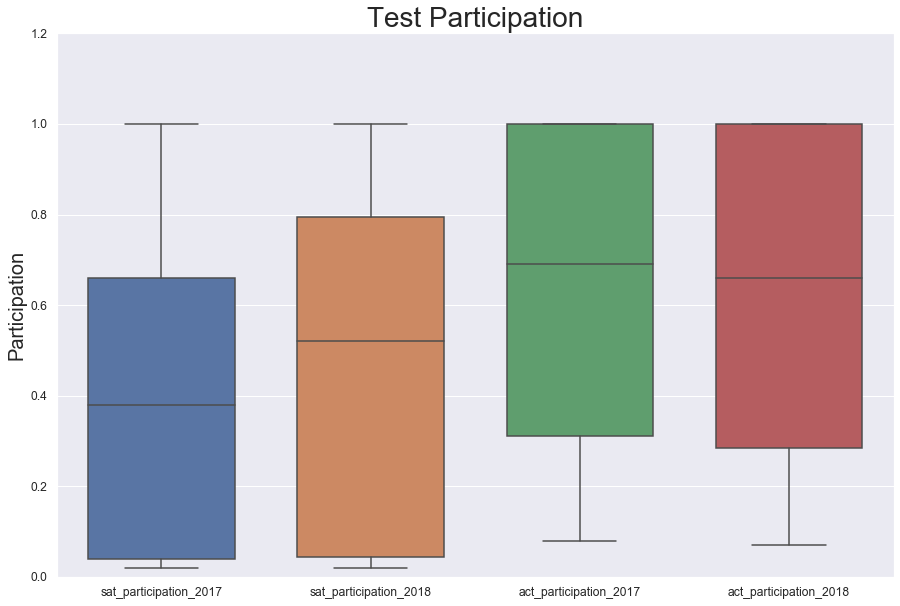

In [89]:
# Box Plot (Participation Rates for SAT and ACT 2017/2018)

ax = plt.subplots(figsize=(15,10))               ### Notice how the image is slightly blurred? 
plt.title('Test Participation',fontsize=28)      ### You can avoid this by forcing the dpi 
plt.ylabel('Participation',fontsize=20)          ### ax = plt.subplots(dpi=160, figsize=(15,10))   
plt.ylim(0, 1.2)

sns.boxplot(data = combined_df[['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']],width=0.7)

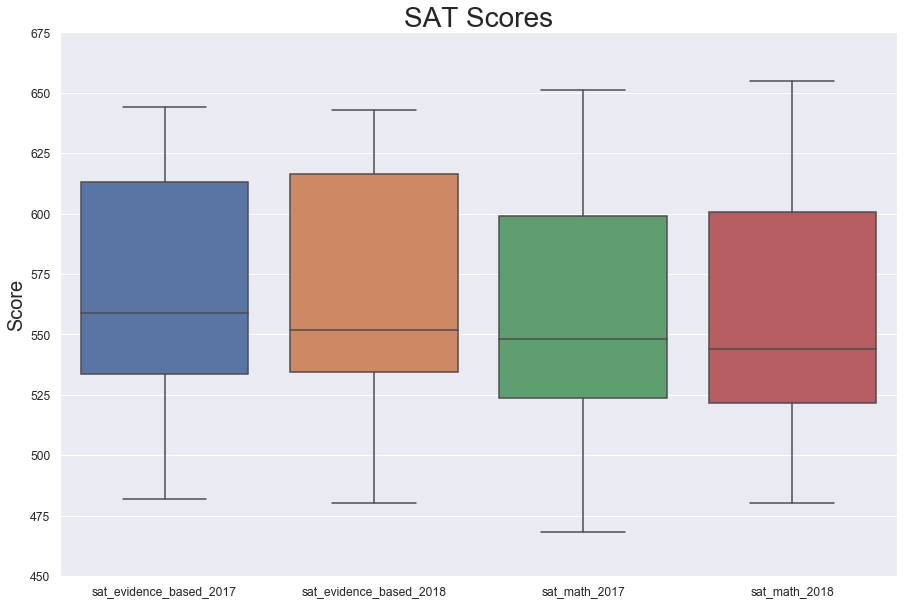

In [75]:
# Box Plot (SAT Scores 2017-2018: Evidence Based Reading and Writing & Math)

ax = plt.subplots(figsize=(15,10))
plt.title('SAT Scores',fontsize=28)
plt.ylabel('Score',fontsize=20)
plt.ylim(450, 675)
sns.boxplot(data = combined_df[['sat_evidence_based_2017','sat_evidence_based_2018','sat_math_2017','sat_math_2018']],width=0.8)

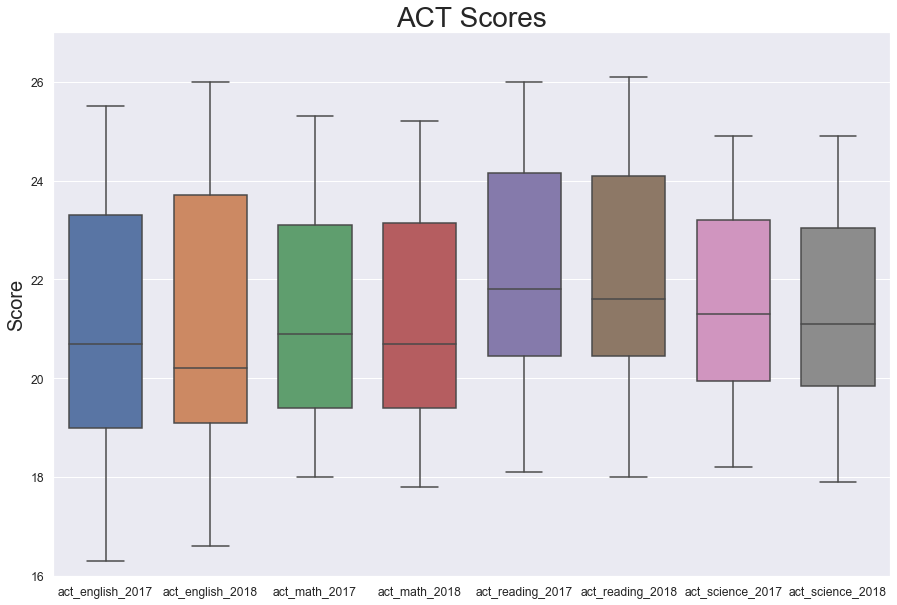

In [76]:
# Box Plot (ACT Scores 2017-2018: English, Math, Reading & Science)


ax = plt.subplots(figsize=(15,10))
plt.title('ACT Scores',fontsize=28)
plt.ylabel('Score',fontsize=20)
plt.ylim(16, 27)

sns.boxplot(data = combined_df[['act_english_2017','act_english_2018','act_math_2017','act_math_2018','act_reading_2017','act_reading_2018','act_science_2017','act_science_2018']],width=0.7)

### Chloropeth Maps (Generated Using Tableau Public)

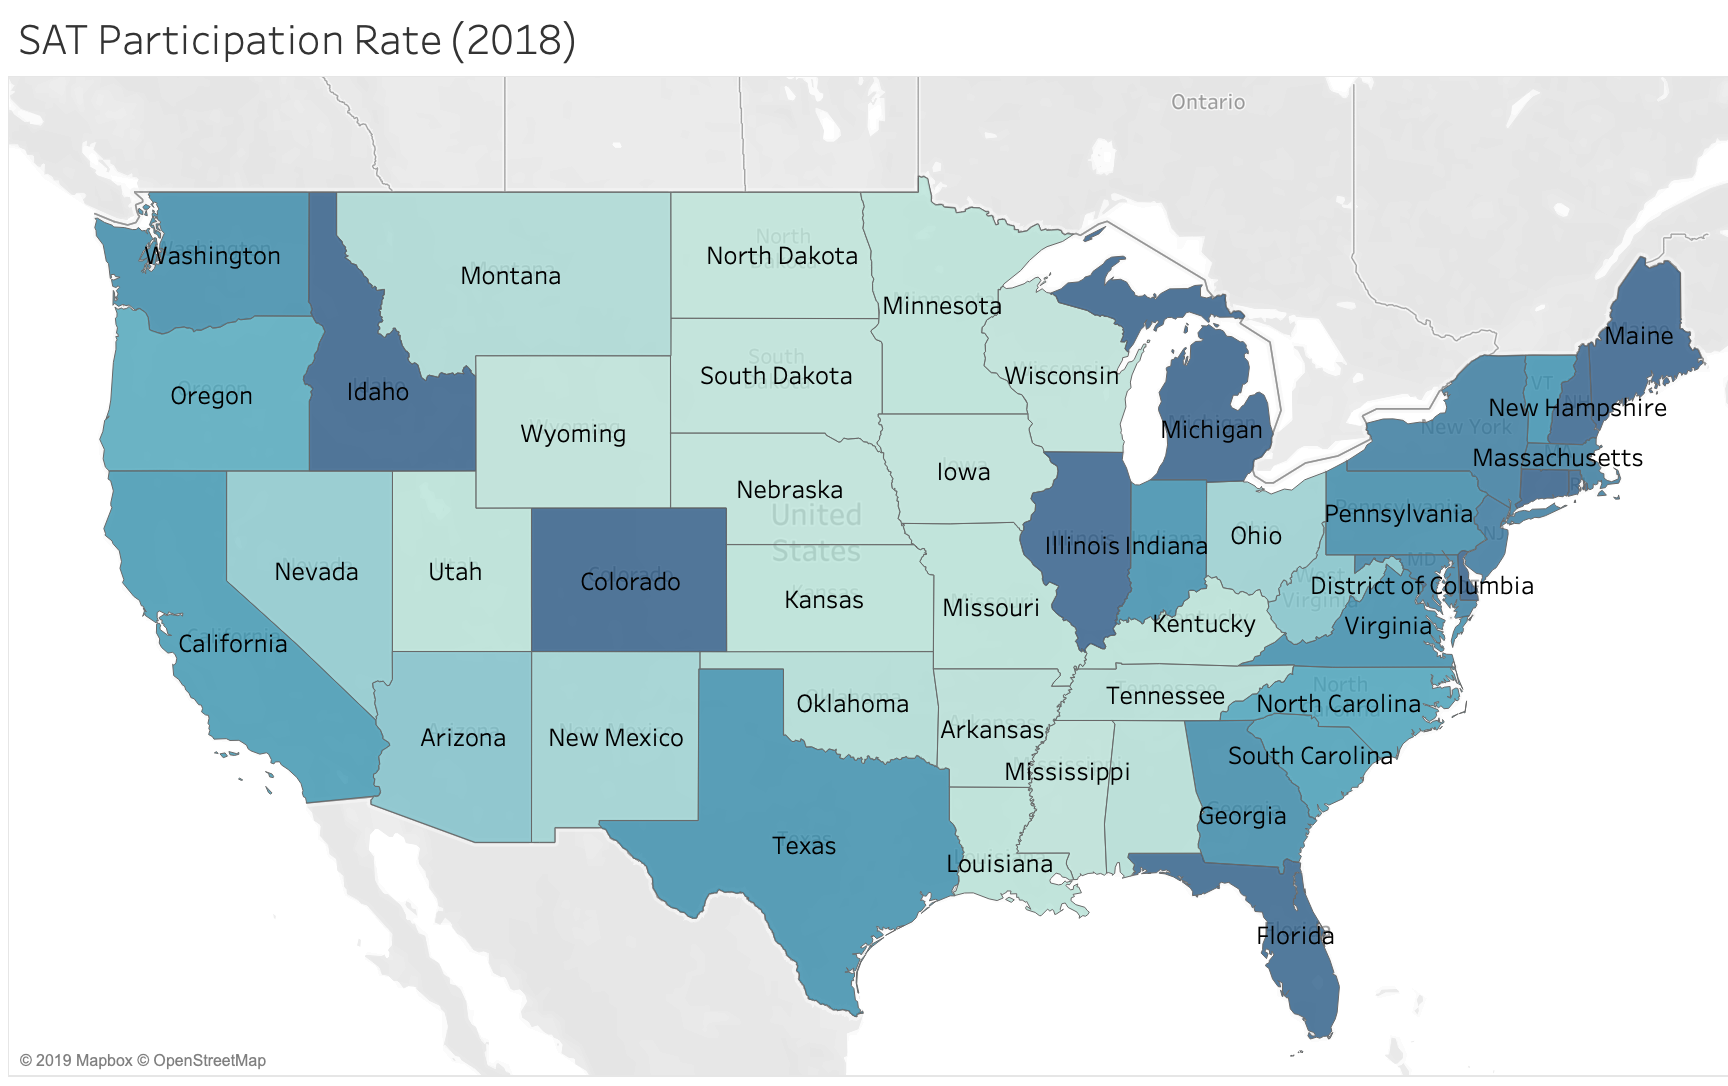

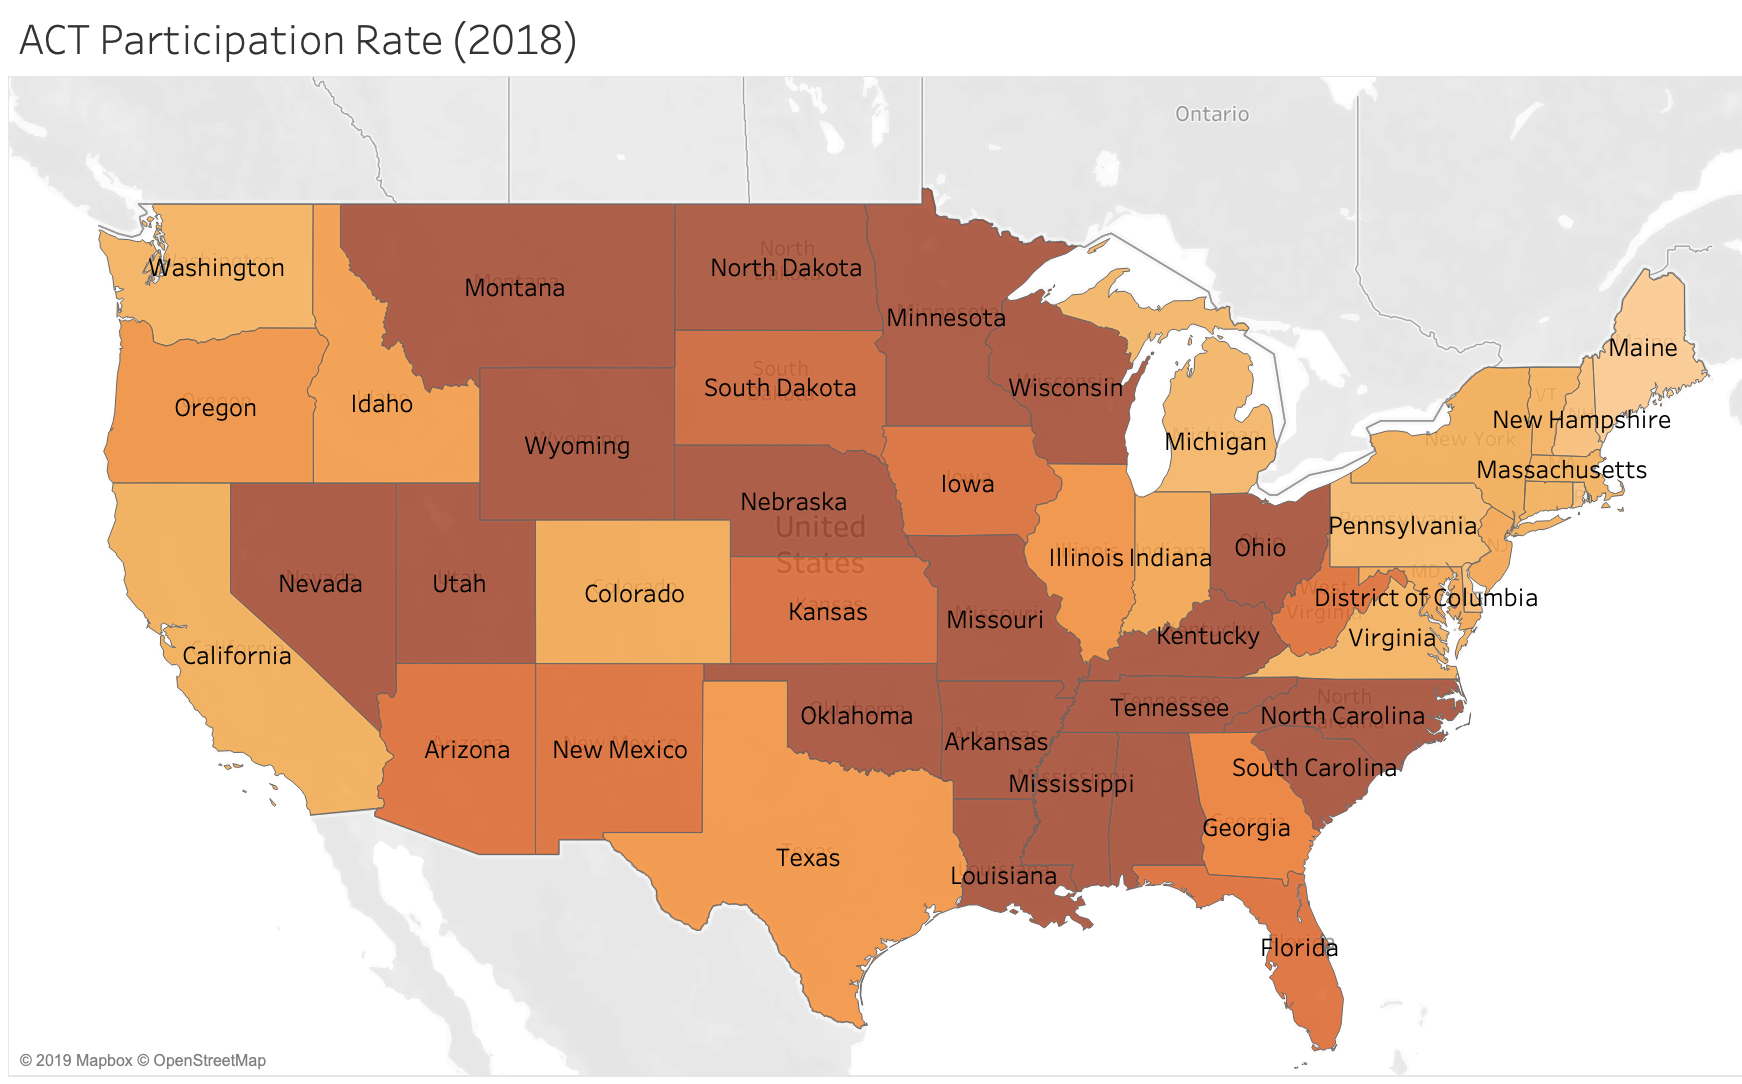

In [ ]:
### Nice graphic, though it's confined to the Lower 48 (missing states), and the state names aren't clearly labelled.
### Some state names in the north east are not visible (Delaware, New York, Vermont)

## Descriptive and Inferential Statistics

#### Summarising Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [77]:
# Overall Summary Stats

combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_evidence_based_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_participation_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_composite_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


Answers:

SAT:

The 2017 and 2018 SAT participation rates are not normally distributed. 2017's distribution is right-skewed (mean > median) while 2018's distriution is left-skewed (median > mean).


The 2017 and 2018 SAT total scores are also both skewed to the right with their means, 1126 and 1123 respectively, greater than their medians, 1107 and 1098 respectively.

ACT:

The 2017 and 2018 ACT participation rates are not normally distributed. Both of them are left skewed (median > mean).

The 2017 and 2018 ACT composite scores have their means and medians roughly equal. However, they are not normally distributed as the mode is not equivalent. 


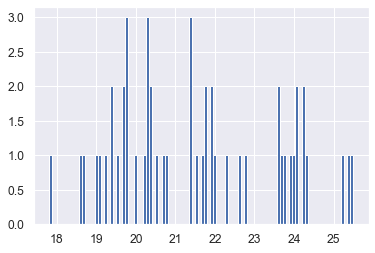

In [78]:
# Distribution for ACT 2017 Composite Scores

combined_df.act_composite_2017.hist(bins=100)        ### Histogram binning should not generally not be manually set,
plt.show()                                           ### appropriate bin size usually derived from freedman-diaconis rule

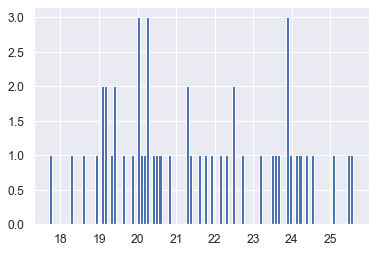

In [79]:
# Distribution for ACT 2018 Composite Scores

combined_df.act_composite_2018.hist(bins=100)
plt.show()

#### We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: We do not see this trend in most of the distributions based on the summary statistics generated.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The assumptions hold for Math, Reading and Rates. Parametric calculations would be incorrect if the data is not normally distributed.

In [ ]:
### Correct, but perhaps test for normality? Shapiro - Wilk.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?


Answer: The SAT and ACT participation rates are based on entire populations of high school graduates so it might not be appropriate to conduct statistical inference in such an instance. 

In [ ]:
### Correct

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: It would not be appropriate to compare these scores as they have different formats and grading scales. At the same time, it is important to consider that these tests are not all made compulsory in the states so there may be a selection bias for those who participate in the tests.

## Outside Research

Based on the observations above as well as open-source research, it can be surmised that major changes seen in participation rates are often preceded by educational policy shifts that mandate or remove SAT and/or ACT requirements. 

In particular, [Illinois](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html), [Colorado](https://www.testive.com/colorado-sat-change-2017/) and [Rhode Island](https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores) have seen huge increases and achieved close to or 100% SAT participation rates in 2018 after authorities have made decisions favouring SAT.

At the same time, we should also take note that these states have registered decreases in ACT participation rates. Illinois has seen a decrease from (93% to 43%), while Colorado and Rhode Island have seen these respective decreases from 100% to 30% and 21% to 15%.

## Conclusion and Recommendations

Insofar as educational policies have a pertinent impact on participation rates of standardised assessments, it is paramount for the College Board to maintain good relationships with relevant authorities of local educational departments.

At the same time, it is noteworthy to mention that SAT participation rates are often found to be negatively correlated with ACT participation rates. The College Board might henceforth find it much more worthwile to target states with relatively modest ACT participation states but retain room for further growth in SAT participation rates.

One such state is California whose SAT and ACT participation rates in 2018 are 60% and 27% respectively. Considering that the state has one of the biggest student populations and is also the location where reputable universities reside, this is a strategic territory that the College Board cannot afford to lose.

Most recently, there has also been [an observed trend of colleges turning away from standardised tests like the SAT/ACT in favour of test-optional programs](https://www.businessinsider.sg/more-schools-than-ever-are-turning-away-from-sat-and-act-for-admission-2019-10/). In California, [the school academic senate is currently studying whether to drop standardised tests and will issue their recommendations by February.](https://www.latimes.com/california/story/2019-10-29/california-groups-demand-uc-drop-the-sat-saying-they-illegally-discriminate-against-disadvantaged-students).

It is henceforth paramount for the College Board to work with the senate in the more immediate term to ensure that SAT would remain a relevant assessment for college admission. California is a key market for College Board, not only in its numerical significance but as a strategic territory that will have a significant impact on the wider college admissions landscape.